In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
#Creando nuestro data frame para dividir la información
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

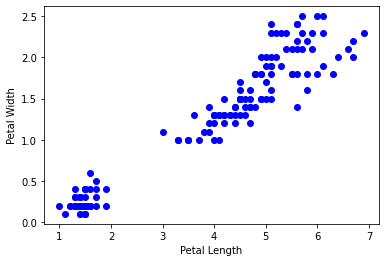

In [5]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)
#Los puntos graficados corresponden a los puntos anteriores de la tabla, visualmente se puede evidenciar
#que existen dos grupos 

Vamos a encontrar todas las similitudes de acuerdo a las cuatro caracteristicas, ahora vamos a dividirlo a traves de sus centroides, entrenando y haciendo la predicción y despues mostrando la visualización 

In [6]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

In [7]:
y_kmeans = model.predict(x)
print('Predicciones', y_kmeans)

Predicciones [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [8]:
from sklearn import metrics
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print('Su precisión es: ',accuracy)

Su precisión es:  0.7302382722834697


Podemos validad si su precisión es mejor cuando aumentamos K, en los ejemplo se probaron con los numeros 2, 3 y 4, probando con estos valores nos damos cuenta que el numero de centroides adecuado es 3, que nos da una precisión más cercana a 100

### Graficación del modelo

Text(0, 0.5, 'Petal Width')

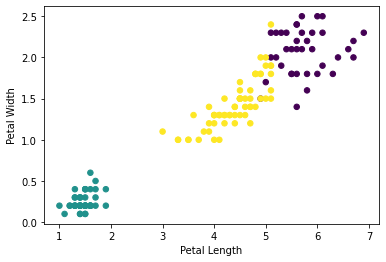

In [9]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

 Siempre que utilice ese tipo de datos es recomendado utilizar una visualización, para verlo de una manera grafica, de esta manera puede generar una relación entre dato y etiqueta final 
 

## Reto de la clase - Cargar Data Set Vinos (wines)

Descarga de los datos de vinos

In [27]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler #Utilizado para la estandarización de los datos
#load_wines()
vinos = datasets.load_wine()
variables = np.array(vinos.feature_names)
x_vinos = vinos.data
y_vinos = vinos.target

Normalización de los valores de "X"

In [28]:
scaler = StandardScaler()
scaler.fit(vinos.data)
x_scaled = scaler.transform(vinos.data)
x = pd.DataFrame(x_scaled, columns = variables)
y = pd.DataFrame(y_vinos, columns =['Target'])
x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Elaboración del Modelo y el Metodo del Codo

Cantidad de Centroides: 1 ---- Precision: 0.0
Cantidad de Centroides: 2 ---- Precision: 0.3743
Cantidad de Centroides: 3 ---- Precision: 0.8975
Cantidad de Centroides: 4 ---- Precision: 0.7177
Cantidad de Centroides: 5 ---- Precision: 0.6523
Cantidad de Centroides: 6 ---- Precision: 0.4712
Cantidad de Centroides: 7 ---- Precision: 0.5552
Cantidad de Centroides: 8 ---- Precision: 0.4494
Cantidad de Centroides: 9 ---- Precision: 0.4016
Cantidad de Centroides: 10 ---- Precision: 0.3357


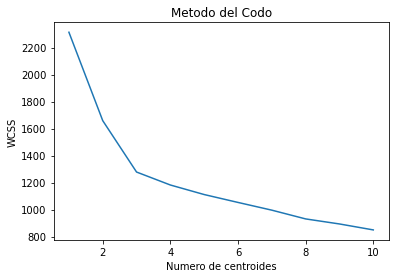

 Se recomienda emplear una cantidad de 3 centroides, para asi garantizar una precision de 0.8975


In [37]:
wccs =[]
n = 3
acc = 0
for i in range(1, 11):
    codo =KMeans(n_clusters = i, max_iter = 1000, random_state =0)
    codo.fit(x)
    y_kmeans = codo.predict(x)
    wccs.append(codo.inertia_)
    accuracy = round(metrics.adjusted_rand_score(y_vinos, y_kmeans), 4)
    print(f'Cantidad de Centroides: {i} ---- Precision: {accuracy}')
    if accuracy > acc:
        acc = accuracy
        n = 3
plt.plot(range(1, 11), wccs)
plt.title('Metodo del Codo')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.show()
print(f' Se recomienda emplear una cantidad de {n} centroides, para asi garantizar una precision de {acc}')

Ejecución del modelo KMeans con la cantidad de centroides selesccionados

In [38]:
modelo = KMeans(n_clusters = n, max_iter = 1000)
modelo.fit(x)
y_label = modelo.labels_
y_kmeans = modelo.predict(x)
print('prediciones', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

prediciones [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Precisión

In [39]:
accuracy = metrics.adjusted_rand_score(y_vinos, y_kmeans)
print(round(accuracy, 5))

0.89749


Visualización del modelo

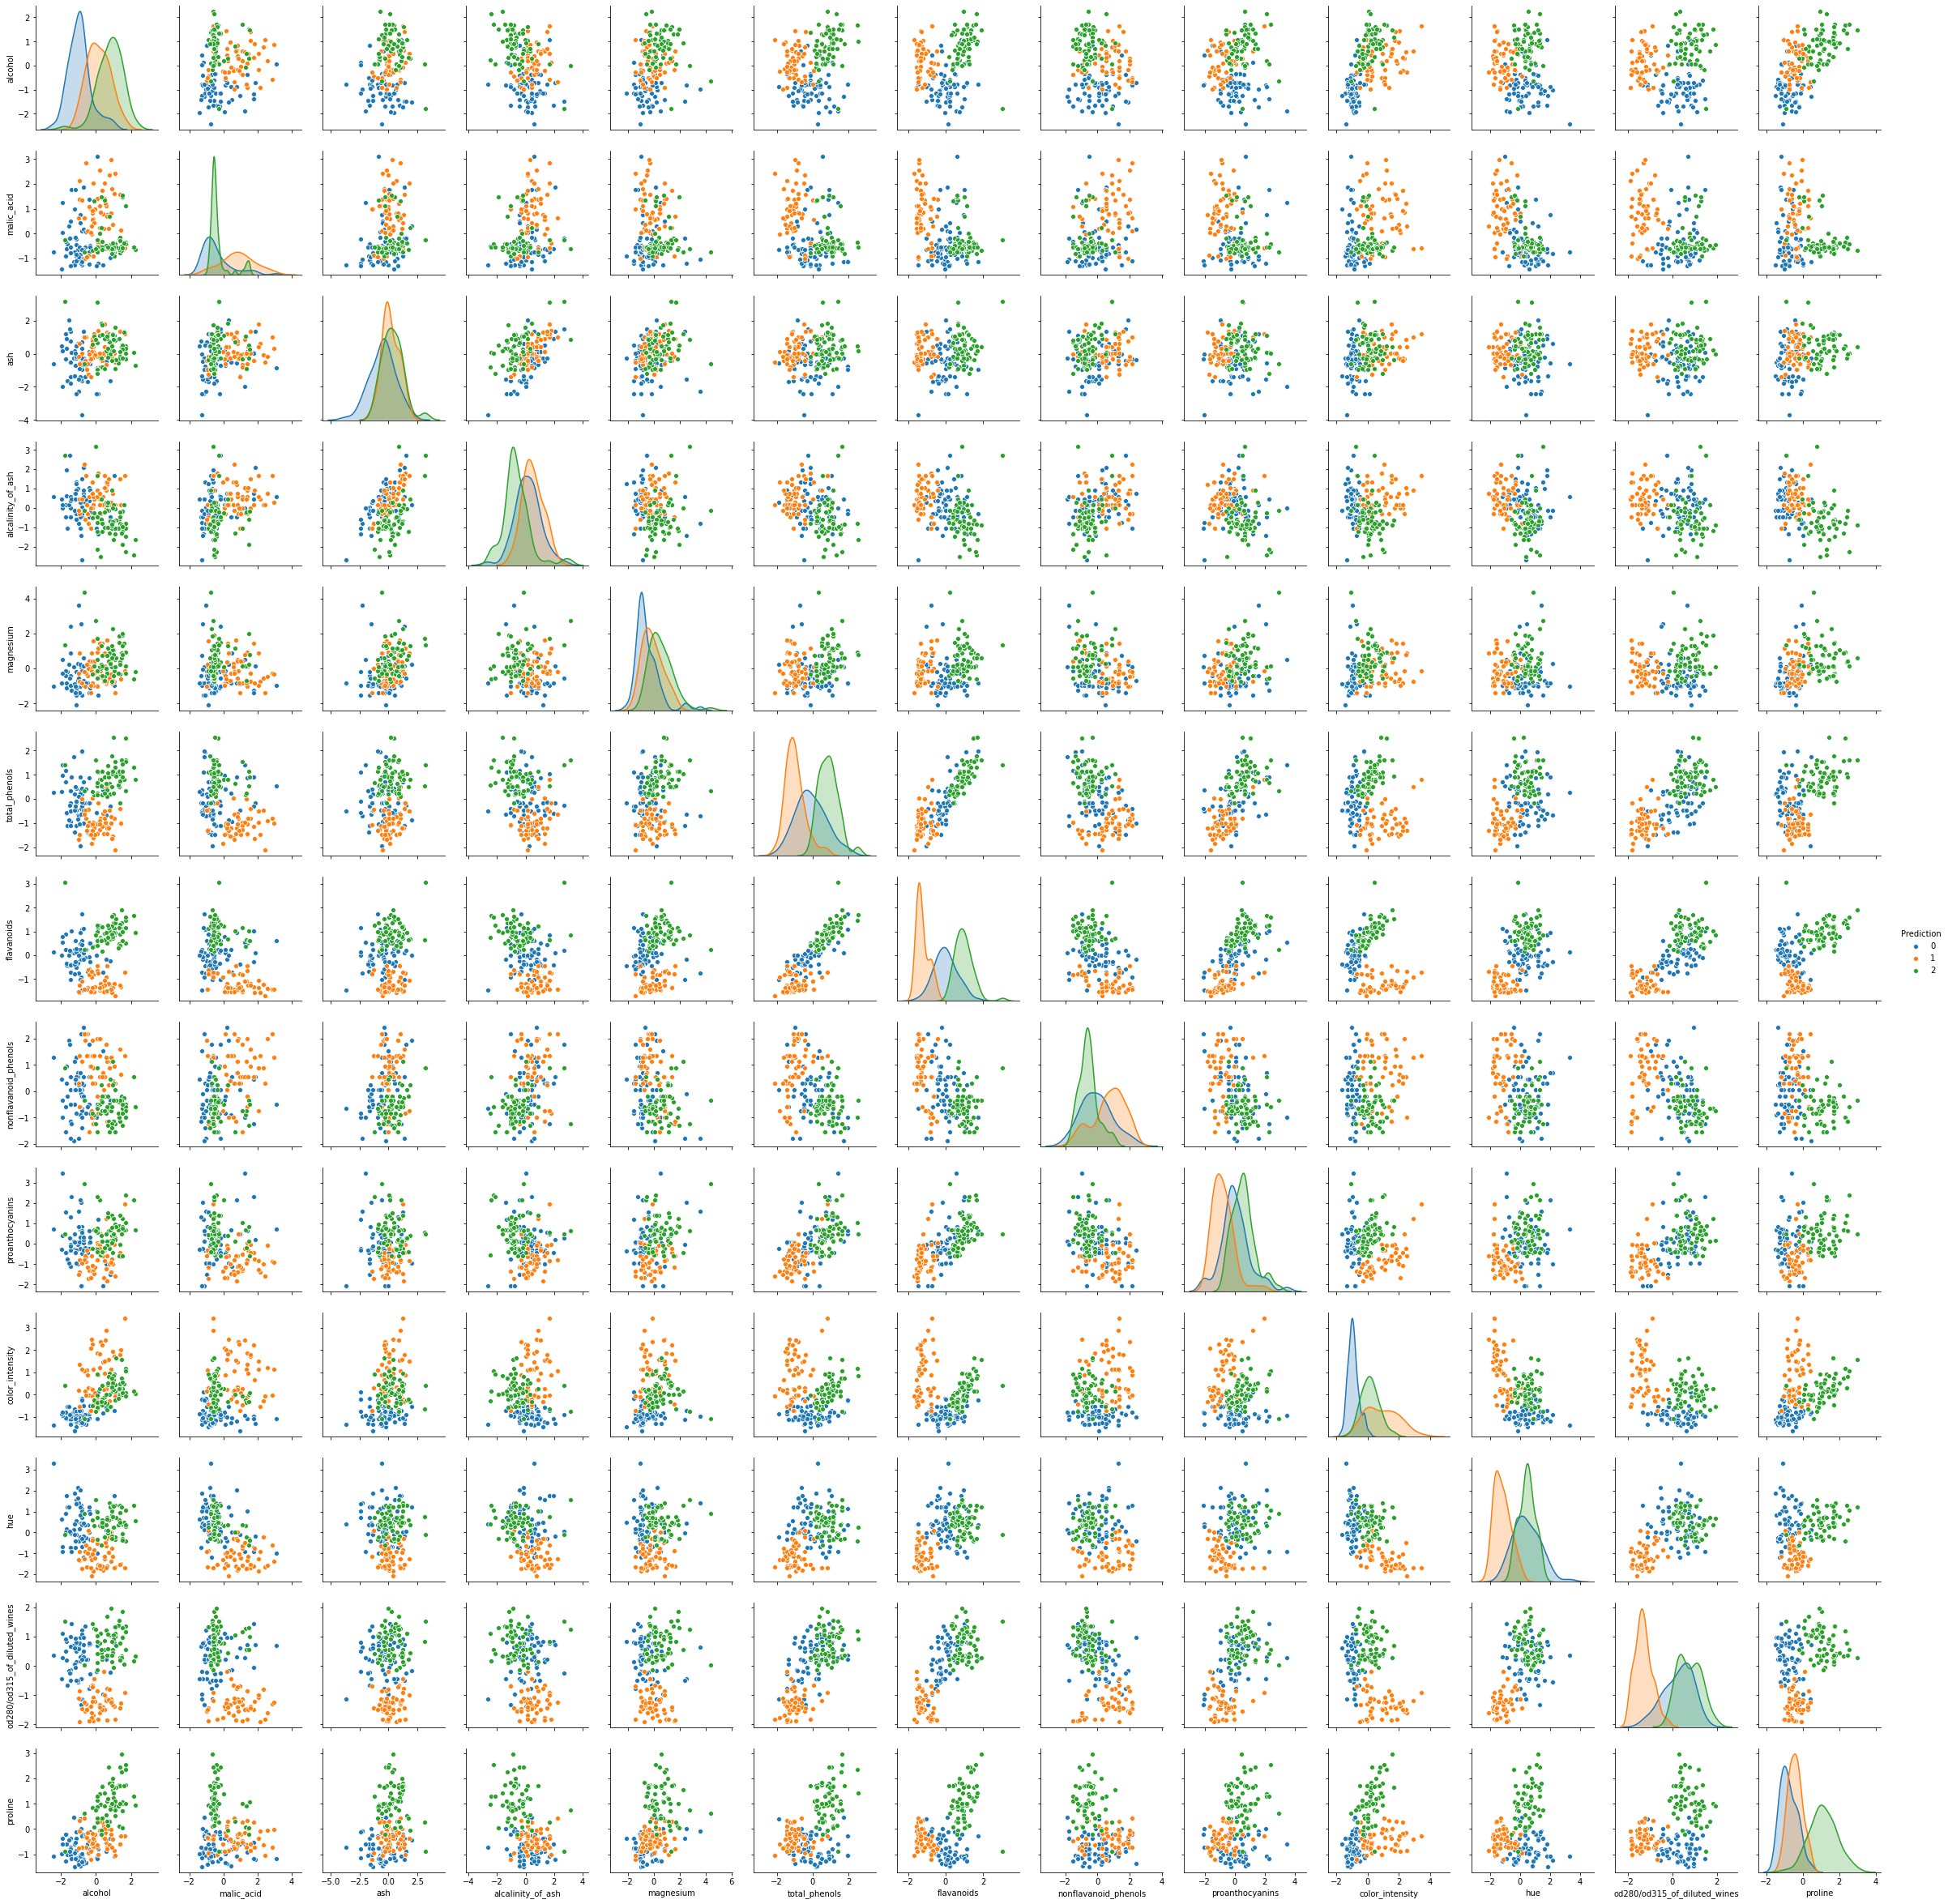

In [40]:
#Concateno el dataset de entrada con el de la predicción
z = pd.concat([x, y_kmeans_df], axis =1)
#Grafico
sns.pairplot(z, hue = 'Prediction')
